<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/TestePratico1_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from keras.utils import np_utils

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/train.csv.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [0]:
path = "/content/drive/My Drive/test.csv.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [0]:
#setamos o seed para reprodução do experimento
np.random.seed(2)

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

#retiramos a informação do digito
x_train = df_train.drop(["label"], axis=1).values
#apesar do dataset ja estar no formato 28x28, o framework do keras espera que seja
#informado a terceira dimensão,portanto já redimensionamentos para 28x28x1.
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = df_test.values.reshape((df_test.shape[0], 28, 28, 1))


In [0]:
# utilizamos a função to_categorial do utils do keras para fazermos o one-hot-encoder da classe.
y_train = df_train["label"].values
y_train = np_utils.to_categorical(y_train)

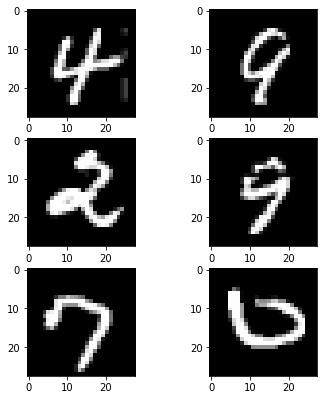

In [21]:
#visualizando randomicamente algumas imagens
for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    plt.subplot(3,2,i+1)
    plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
## dado que o range de valores possível pra um pixél vai de 0-255 
## escalonamos os valores entre 0-1
## esse processo torna nosso modelo menos variante a pequenas alterações.
x_train = x_train / 255
x_test = x_test / 255

In [0]:
from tensorflow.keras import layers, models
model = models.Sequential()

In [33]:
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


"\ncnn = models.Sequential()\n\ncnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))\ncnn.add(layers.MaxPooling2D(2,2))\n\ncnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))\ncnn.add(layers.MaxPooling2D(2,2))\n\ncnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))\n\ncnn.add(layers.Flatten())\n\ncnn.add(layers.Dense(64, activation = 'relu'))\n\ncnn.add(layers.Dense(10, activation = 'softmax'))\n\ncnn.summary()"

In [36]:
optimizer = 'Adam'
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [0]:
# reduz o parâmetro de learning rate se não houver 
# melhoras em determinado número de epocas
# útil para encontrar o mínimo global.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

batch_size = 32
epochs = 10

In [48]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10


InvalidArgumentError: ignored